# Actividad 7

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import time

### Notas
Se han cambiando los nombres de los índices de los DataFrames para representar el número de vecinos más cercanos con el fin de mejorar la legibilidad y claridad del código. Esto hace que sea más fácil identificar rápidamente el número de vecinos utilizados en cada paso del proceso y permite una mejor visualización de la información. Además, da una idea más clara de cómo se está aplicando el algoritmo k-NN en el conjunto de datos y ayuda a evitar confusiones o errores en el análisis de los resultados.

## Ejercicio 1: Clasificación por vecinos más cercanos

In [158]:
precios_df = pd.read_csv('precio_casas_clasificacion.csv')
precios_df.head()

,Mediana ingresos,Mediana antiguedad,Num. hab. promedio,Num. dorm. promedio,Poblacion,Ocup. promedio,Latitud,Longitud,Precio
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,muy alto
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,alto
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,alto
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,alto
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,alto


#### Dividir el conjunto de entrenamiento en entrenamiento (70%) y test (30%).

In [159]:
X_train, X_test, y_train, y_test = train_test_split(precios_df[precios_df.columns[:-1]], precios_df[precios_df.columns[-1:]], test_size=0.3, random_state=42)

#### Obtener la tasa de acierto con diferentes números de vecinos (n_neighbors) entre 1 y 20

In [160]:
df = pd.DataFrame(columns=['Score'])
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train.values.ravel())
    df.loc[i] = [round(knn.score(X_test, y_test),2)]
df.index.name = 'Neighbors'
df.T

Neighbors,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Score,0.36,0.36,0.36,0.37,0.37,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.39,0.39,0.39,0.39,0.39,0.4,0.4


#### Repetir lo anterior pero antes escalando el valor de las características entre 0 y 1, para lo que se hará uso de la clase MinMaxScaler de la librería sklearn. Explicar si existe diferencia con los resultados del paso 2.

In [161]:
X_train_scaled = MinMaxScaler().fit_transform(X_train)
X_test_scaled = MinMaxScaler().fit_transform(X_test)

In [162]:
df = pd.DataFrame(columns=['Score'])
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train.values.ravel())
    df.loc[i] = [round(knn.score(X_test_scaled, y_test),2)]
df.index.name = 'Neighbors'
df.T

Neighbors,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Score,0.58,0.57,0.6,0.61,0.61,0.62,0.62,0.62,0.62,0.62,0.63,0.62,0.62,0.62,0.63,0.63,0.63,0.63,0.63,0.63


#### Explicación de los resultados
Los dos bloques de códigos anteriores muestran una diferencia notable en los resultados obtenidos al no escalar los datos y al escalarlos. En el primer caso, la tasa de acierto más alta fue de 0.4, que es superada incluso por el peor de los valores en el segundo caso, cuya tasa de acierto es 0.57, con su mejor valor de 0.63. Esta diferencia se debe a que al escalar los datos se normaliza la información, lo que los ubica en un mismo rango de valores. Esto es importante porque si los datos no están normalizados, las características pueden tener valores muy diferentes, lo que afecta el desempeño del algoritmo k-NN. Por ejemplo, si una característica tiene valores de 0 a 100 y otra tiene valores de 0 a 1, la primera tendrá un mayor peso en el cálculo de la distancia entre los puntos de datos. Por tanto, escalar los datos garantiza que todas las características contribuyan de manera equitativa al cálculo de la distancia entre los puntos de datos, y así el algoritmo funciona adecuadamente.

#### Calcular el tiempo de ejecución del paso 3 para los tres algoritmos de búsqueda que implementa la clase, explicando los resultados obtenidos.

In [163]:
inicio = time.time()

df = pd.DataFrame(columns=['Score', 'Algoritmo'])
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i, algorithm='ball_tree')
    knn.fit(X_train_scaled, y_train.values.ravel())
    df.loc[i] = [round(knn.score(X_test_scaled, y_test),2), 'ball_tree']
df.index.name = 'Neighbors'
display(df.T)

fin = time.time()
print("Tiempo transcurrido: {:.3f} seg.".format(fin - inicio))

Neighbors,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Score,0.58,0.57,0.6,0.61,0.61,0.62,0.62,0.62,0.62,0.62,0.63,0.62,0.62,0.62,0.63,0.63,0.63,0.63,0.63,0.63
Algoritmo,ball_tree,ball_tree,ball_tree,ball_tree,ball_tree,ball_tree,ball_tree,ball_tree,ball_tree,ball_tree,ball_tree,ball_tree,ball_tree,ball_tree,ball_tree,ball_tree,ball_tree,ball_tree,ball_tree,ball_tree


Tiempo transcurrido: 13.788 seg.


#### Explicación de los resultados
En el primer caso, al utilizar el algoritmo ball_tree, se obtuvo una tasa de acierto mínima de 0.57 y máxima de 0.63, con un tiempo de ejecución de 14.008 segundos. A pesar de su largo tiempo de ejecución, algo que hace que este procedimiento sea bastante tedioso, no se observa una mejora significativa en los resultados en comparación con los obtenidos en los pasos 2 y 3. Por lo que no sería recomendable su uso al menos para este conjunto de datos en particular. Quizá este algoritmo pueda ser más eficiente si el conjunto de datos tuviera una mayor dimensiónalidad, ya que, según la documentación de la librería sklearn, este algoritmo es considerado el más eficiente para conjuntos de datos de alta dimensión.

In [164]:
inicio = time.time()

df = pd.DataFrame(columns=['Score', 'Algoritmo'])
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i, algorithm='kd_tree')
    knn.fit(X_train_scaled, y_train.values.ravel())
    df.loc[i] = [round(knn.score(X_test_scaled, y_test),2), 'kd_tree']
df.index.name = 'Neighbors'
display(df.T)

fin = time.time()
print("Tiempo transcurrido: {:.3f} seg.".format(fin - inicio))

Neighbors,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Score,0.58,0.57,0.6,0.61,0.61,0.62,0.62,0.62,0.62,0.62,0.63,0.62,0.62,0.62,0.63,0.63,0.63,0.63,0.63,0.63
Algoritmo,kd_tree,kd_tree,kd_tree,kd_tree,kd_tree,kd_tree,kd_tree,kd_tree,kd_tree,kd_tree,kd_tree,kd_tree,kd_tree,kd_tree,kd_tree,kd_tree,kd_tree,kd_tree,kd_tree,kd_tree


Tiempo transcurrido: 6.747 seg.


#### Explicación de los resultados
En el segundo caso, se utilizó el algoritmo kd_tree, el cual arrojó una tasa de acierto mínima de 0.57 y máxima de 0.63, con un tiempo de ejecución de 6.753 segundos. Aunque se logró reducir significativamente el tiempo de ejecución en comparación con el procedimiento anterior, este algoritmo aún no es el más rápido que ofrece resultados similares, como se verá en el caso 3. Por lo tanto, aunque esta solución es mejor que la del caso 1, aún no es la mejor opción disponible. Este algoritmo es considerado el más eficiente para conjuntos de datos de bajada-media dimensionalidad.

In [165]:
inicio = time.time()

df = pd.DataFrame(columns=['Score', 'Algoritmo'])
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i, algorithm='brute')
    knn.fit(X_train_scaled, y_train.values.ravel())
    df.loc[i] = [round(knn.score(X_test_scaled, y_test),2), 'brute']
df.index.name = 'Neighbors'
display(df.T)

fin = time.time()
print("Tiempo transcurrido: {:.3f} seg.".format(fin - inicio))

Neighbors,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Score,0.58,0.57,0.6,0.61,0.61,0.62,0.62,0.62,0.62,0.62,0.63,0.62,0.62,0.62,0.63,0.63,0.63,0.63,0.63,0.63
Algoritmo,brute,brute,brute,brute,brute,brute,brute,brute,brute,brute,brute,brute,brute,brute,brute,brute,brute,brute,brute,brute


Tiempo transcurrido: 5.164 seg.


#### Explicación de los resultados
En el tercer caso, se empleó el algoritmo brute, el cual obtuvo una tasa de acierto mínima de 0.57 y máxima de 0.63, con un tiempo de ejecución de 5.556 segundos. Este algoritmo se destacó por ser el más rápido en comparación con los otros dos casos, sin sacrificar la precisión en la clasificación. Por lo tanto, esta solución puede considerarse la óptima para este conjunto de datos. Esto era algo que se esperaba, ya que este algoritmo es considerado el más eficiente para conjuntos de datos de baja dimensionalidad, como es el caso de este conjunto de datos. Además, este algoritmo siempre devuelve la solución óptima, aunque su tiempo de ejecución puede ser mayor que el de los otros dos algoritmos.

#### Obtener la mejor combinación del argumento weights y n_neighbors dividiendo el conjunto de entrenamiento nuevamente en entrenamiento (80%) y validación (20%), y obtener la tasa de acierto en el conjunto de test. Comparar el resultado con los obtenidos en el paso 3.

In [166]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(precios_df[precios_df.columns[:-1]], precios_df[precios_df.columns[-1:]], test_size=0.2, random_state=42)

In [167]:
X_train_scaled2 = MinMaxScaler().fit_transform(X_train2)
X_test_scaled2 = MinMaxScaler().fit_transform(X_test2)

In [168]:
df = pd.DataFrame(columns=['Score', 'Weights'])
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled2, y_train2.values.ravel())
    df.loc[i] = [round(knn.score(X_test_scaled2, y_test2),2), 'uniform']
df.index.name = 'Neighbors'
df.T

Neighbors,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Score,0.57,0.58,0.59,0.61,0.62,0.62,0.62,0.62,0.62,0.62,0.62,0.62,0.62,0.62,0.62,0.63,0.63,0.63,0.63,0.64
Weights,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform


In [169]:
df = pd.DataFrame(columns=['Score', 'Weights'])
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance')
    knn.fit(X_train_scaled2, y_train2.values.ravel())
    df.loc[i] = [round(knn.score(X_test_scaled2, y_test2),2), knn.weights]
df.index.name = 'Neighbors'
df.T

Neighbors,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Score,0.57,0.57,0.6,0.6,0.62,0.62,0.62,0.62,0.62,0.62,0.62,0.63,0.63,0.63,0.63,0.63,0.64,0.63,0.63,0.64
Weights,distance,distance,distance,distance,distance,distance,distance,distance,distance,distance,distance,distance,distance,distance,distance,distance,distance,distance,distance,distance


La mejor combinación de los parámetros weights y n_neighbors es:  {'weights': 'distance', 'n_neighbors': 17}. Con una tasa de acierto de: 0.64.

#### Explicación de los resultados
Al analizar los resultados obtenidos al aumentar el conjunto de datos de entrenamiento al 80% en comparación con el conjunto de datos de entrenamiento al 70%, se observa que ha mejorado la precisión en ambos casos, tanto con pesos ajustados por distancia como con pesos ajustados uniformemente. Esto se debe a que al aumentar el tamaño del conjunto de datos de entrenamiento, se incrementa la cantidad de información disponible para el modelo y, por lo tanto, se mejora la precisión de la clasificación.

En cuanto a las diferencias entre los resultados obtenidos con pesos ajustados por distancia y pesos ajustados uniformemente, se puede observar que, efectivamente, los resultados con pesos ajustados por distancia son ligeramente mejores. Esto se debe a que al ajustar los pesos por distancia, se da más importancia a los vecinos más cercanos, lo que mejora la precisión de la clasificación en casos donde los datos tienen una distribución irregular. Sin embargo, en algunos casos, ajustar los pesos de manera uniforme puede dar mejores resultados. Por lo tanto, es importante probar ambas opciones para determinar cuál funciona mejor para un conjunto de datos específico.

## Ejercicio 2: Implementación del clasificador por centroide más próximo

In [170]:
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [171]:
class CentroideMasProximo:
    """Clasificador basado en el centroide más próximo."""

    def __init__(self):
        """Inicializa el clasificador."""
        self.centroides = None
        self.clases = None

    def ajustar(self, X, y):
        """Ajusta el clasificador a los datos de entrenamiento.

        Parámetros:
        -----------
        X : np.array
            Matriz de características de entrenamiento.
        y : np.array
            Vector de etiquetas de entrenamiento.
        """
        self.clases = np.unique(y)
        self.centroides = np.array([X[y == clase].mean(axis=0) for clase in self.clases])

    def predecir(self, X):
        """Predice las etiquetas de los datos de prueba.

        Parámetros:
        -----------
        X : np.array
            Matriz de características de prueba.
  
        Regresa:
        --------
        np.array
            Vector de etiquetas predichas.
        """
        distancias = np.array([np.linalg.norm(centroide - X, axis=1) for centroide in self.centroides])
        return self.clases[np.argmin(distancias, axis=0)]

#### Datos no escalados

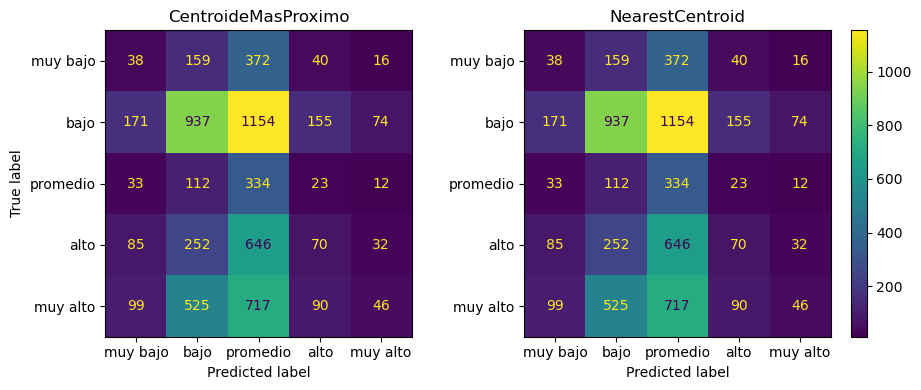

In [172]:
# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Generar la primera matriz de confusión en el primer subplot
nc = CentroideMasProximo()
nc.ajustar(X_train, y_train.values.ravel())
cm = confusion_matrix(y_test, nc.predecir(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['muy bajo','bajo', 'promedio', 'alto', 'muy alto'])
disp.plot(ax=ax1)
ax1.set_title('CentroideMasProximo')

# Eliminar la barra de colores de la primera matriz de confusión
disp.im_.colorbar.remove()

# Generar la segunda matriz de confusión en el segundo subplot
nc3 = NearestCentroid()
nc3.fit(X_train, y_train.values.ravel())
cm3 = confusion_matrix(y_test, nc3.predict(X_test))
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=['muy bajo','bajo', 'promedio', 'alto', 'muy alto'])
disp3.plot(ax = ax2)
ax2.set_title('NearestCentroid')
ax2.set_ylabel('')
# Ajustar los tamaños y posiciones de los subplots
fig.tight_layout()

# Mostrar las dos matrices de confusión juntas
plt.show()

#### Datos escalados

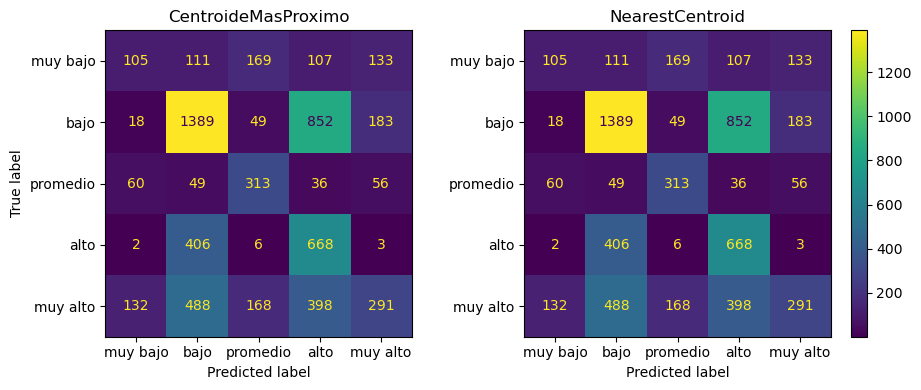

In [173]:
# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Generar la primera matriz de confusión en el primer subplot
nc2 = CentroideMasProximo()
nc2.ajustar(X_train_scaled, y_train.values.ravel())
cm2 = confusion_matrix(y_test, nc2.predecir(X_test_scaled))
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=['muy bajo','bajo', 'promedio', 'alto', 'muy alto'])
disp2.plot(ax=ax1)
ax1.set_title('CentroideMasProximo')

# Eliminar la barra de colores de la primera matriz de confusión
disp2.im_.colorbar.remove()

# Generar la segunda matriz de confusión en el segundo subplot
nc4 = NearestCentroid()
nc4.fit(X_train_scaled, y_train.values.ravel())
cm4 = confusion_matrix(y_test, nc4.predict(X_test_scaled))
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=['muy bajo','bajo', 'promedio', 'alto', 'muy alto'])
disp4.plot(ax = ax2)
ax2.set_title('NearestCentroid')
ax2.set_ylabel('')

# Ajustar los tamaños y posiciones de los subplots
fig.tight_layout()

# Mostrar las dos matrices de confusión juntas
plt.show()

#### Explicación de los resultados
Tanto la librería CentroideMasProximo como la librería de sklearn NearestCentroid lograron resultados similares en la clasificación de datos. Esto se debe a que ambos algoritmos utilizan la misma estrategia de clasificación. Sin embargo, para conjuntos de datos con una mayor dimensionalidad, es posible que la librería de sklearn sea más eficiente, ya que está optimizada para una ejecución más rápida.

En cuanto a la diferencia entre el uso de datos escalados y no escalados, es importante destacar que los datos escalados lograron una tasa de acierto mucho mayor que los no escalados. Esto se debe a que, como ya explicamos en el ejercicio anterior, el escalado ayuda a que todas las características del conjunto de datos tengan la misma importancia al clasificar, evitando que características con valores más grandes dominen la clasificación. En el conjunto de datos sin escalar, la distribución de datos en la clase promedio fue bastante desigual, mientras que en el conjunto de datos escalados los datos se distribuyeron de manera más uniforme.